In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

In [2]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akumar5189","key":"42b31738db061eb699fd5e96045b3a26"}'}

In [3]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d karthikaanil/alphanumeric-characters

 38% 5.00M/13.1M [00:00<00:00, 46.6MB/s]
100% 13.1M/13.1M [00:00<00:00, 87.2MB/s]


In [ ]:
!unzip /content/drive/MyDrive/HCR/alphanumeric-characters.zip

In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('alphanumerals.csv')
data.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [8]:
data.label.value_counts()

0    55
k    55
X    55
Y    55
Z    55
     ..
P    55
Q    55
R    55
S    55
z    55
Name: label, Length: 62, dtype: int64

In [9]:
labels = data.label.unique()
labels

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], dtype=object)

In [10]:
num_class = len(labels)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(list(data['label']))


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
imgs = []
for imagename in data['image']:
  image = plt.imread(imagename)[:,:,1]
  image = resize(image,(224,224))
  imgs.append(image)

imgs = np.array(imgs)
imgs = imgs/255

In [12]:
label = np.array(label)
imgs = np.expand_dims(imgs,axis=3)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(imgs,label,test_size=0.3,random_state=23)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten,Dense
from tensorflow.keras.utils import plot_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        11712     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                        

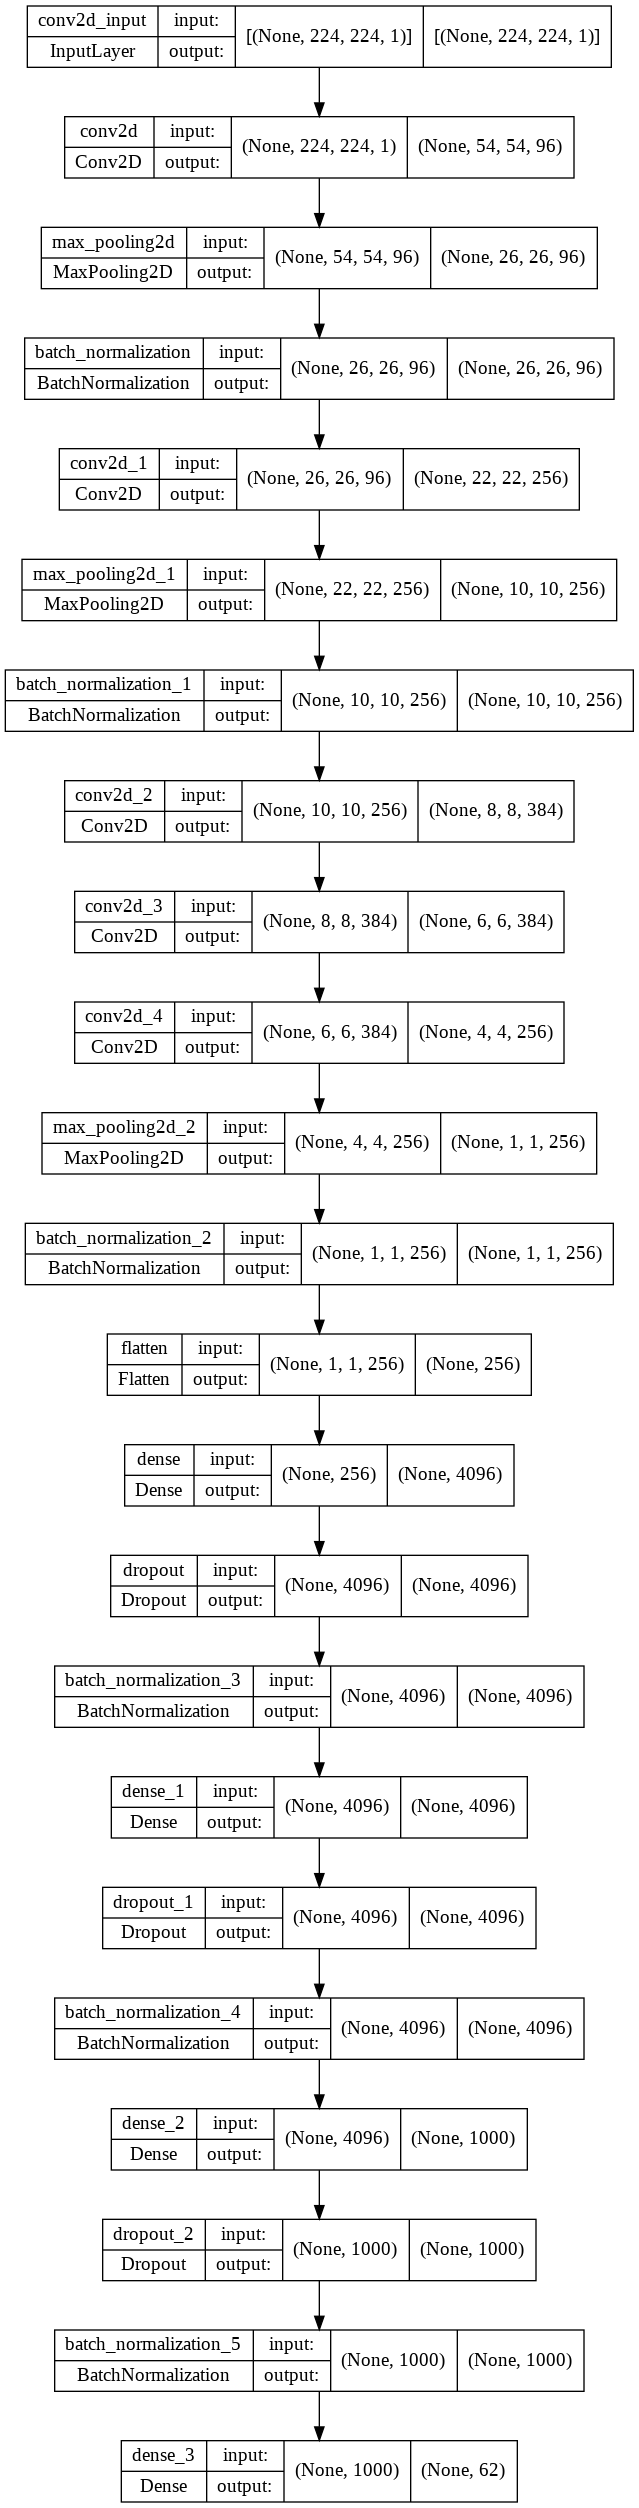

In [14]:
# alexnet 


model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(224,224,1)))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#4 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#5 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#6 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#7 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#8 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#9 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#10 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#11 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(num_class,activation="softmax"))

model.summary()

plot_model(model,show_shapes=True)

In [15]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
his = model.fit(xtrain, ytrain, epochs=100)

Epoch 1/100
75/75 [==============================] - 16s 65ms/step - loss: 3.9714 - accuracy: 0.1031
Epoch 2/100
75/75 [==============================] - 4s 59ms/step - loss: 2.9682 - accuracy: 0.2401
Epoch 3/100
75/75 [==============================] - 4s 59ms/step - loss: 2.2179 - accuracy: 0.3904
Epoch 4/100
75/75 [==============================] - 4s 60ms/step - loss: 1.7045 - accuracy: 0.5044
Epoch 5/100
75/75 [==============================] - 4s 60ms/step - loss: 1.3967 - accuracy: 0.5773
Epoch 6/100
75/75 [==============================] - 4s 60ms/step - loss: 1.1694 - accuracy: 0.6477
Epoch 7/100
75/75 [==============================] - 4s 60ms/step - loss: 0.9784 - accuracy: 0.6971
Epoch 8/100
75/75 [==============================] - 4s 59ms/step - loss: 0.8447 - accuracy: 0.7373
Epoch 9/100
75/75 [==============================] - 4s 59ms/step - loss: 0.7709 - accuracy: 0.7524
Epoch 10/100
75/75 [==============================] - 4s 59ms/step - loss: 0.6815 - accuracy: 0.785

In [24]:
img = plt.imread('Img/img005-001.png')
plt.imshow(img)
plt.title('input image')
plt.axis('off')
plt.show()

In [ ]:
img = resize(img[:,:,1],(224,224))/255
img = np.expand_dims(img,axis=0)
img = np.expand_dims(img,axis=3)
out = model.predict(img)

label = np.argmax(out[0])
label = le.inverse_transform(np.array([label]))
print(f'Recognized character : {label[0]} ')
output = data[data['label']==label[0]]['image'].iloc[0]
plt.imshow(plt.imread(output))
plt.title('output')
plt.show()from flask import Flask,render_template,request
from flask_ngrok  import run_with_ngrok

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)

@app.route('/',methods=['GET','POST'])
def output():
    prediction = 0
    imgpath = ''
    filename =''
    if request.method == 'POST':
        img = request.files['file']
        filename = img.filename
        imgpath = 'ngrok-ssh/static/'+filename
        img.save(imgpath)
        print('image saved')
        time.sleep(10)
        img = plt.imread(imgpath)
        img = resize(img[:,:,1],(224,224))/255
        img = np.expand_dims(img,axis=0)
        img = np.expand_dims(img,axis=3)
        out = model.predict(img)
        label = np.argmax(out[0])
        label = le.inverse_transform(np.array([label]))
        prediction = label[0]
    
    return render_template('index.html',prediction=prediction,img_path=imgpath,filename=filename)

app.run()